## Strategy:

- at current price if last k days is trend_decreasing and current price < price_lastk_days => buy 
- at current price if last k days is trend_increasing and current price > price_last_k_days => sell 

In [261]:
import pandas as pd 
import numpy as np 
import os 
import requests
import time 
import logging
import matplotlib.pylab as plt 
import matplotlib


params = {"axes.titlesize":15,
        "font.family":'sans-serif',
         "figure.dpi":90,
          "figure.figsize":(18,8),
          "font.size":    10.0,
          "axes.labelsize" : 10
         }
plt.rcParams.update(params)
TOKEN_CRYPTO = os.environ.get("TOKEN_CRYPTO")

SYMBOL ='XRP'

In [215]:


def download_price(from_symbol, to_symbol, exchange='Bitstamp', datetime_interval='day',save=True):
    
    base_url = 'https://min-api.cryptocompare.com/data/v2/histo'
    
    url = base_url+ datetime_interval
    
    params = {'fsym': from_symbol,
              'tsym': to_symbol,
#               'limit': 2000, 
              'allData':'true',
              'aggregate': 1,
              "api_key": TOKEN_CRYPTO,
              'e': exchange}
    
    request = requests.get(url, params=params)
    data = request.json()
    if save:
        filename = '{symbol}_price_{date}.csv'.format(symbol=from_symbol,date=time.strftime('%Y%m%d'))
        df = pd.DataFrame(data['Data']['Data'])
        df.to_csv(filename,index=False)
        logging.info('file saved in {}'.format(filename))
    return data


# ===========================================
def _trend_decreasing(datum, length=3):
    """ """
    data = datum.copy()
    if "close" not in data.columns:
        return data
    
    def stricly_decreasing(series, n):
        a =  all([i > j for i, j in zip(series[-n:], series[1:])])
        return a

    close = data["close"]
   

    decreasing = close.rolling(length, min_periods=length).apply(
        stricly_decreasing, args=(length,), raw=False
    )
#     Percentage change between the current and a prior element.
    decreasing_perc = close.pct_change(periods=length)
    decreasing.fillna(0, inplace=True)
    decreasing = decreasing.astype(bool)
    data["trend_decreasing_last_{}_days".format(length)] = decreasing
    data["trend_decreasing_last_{}_days".format(length)] = data["trend_decreasing_last_{}_days".format(length)].shift(1)
    data["trend_decreasing_perc_{}".format(length)] = decreasing_perc
#     data['decreasing_shift_last_2_days'] = data['trend_decreasing_last_2_days'].shift(1)

    return data



def to_date(x):
    '''
    '''
       
    x = pd.Timestamp(x,unit='s').date()
    return x

In [216]:
# datum = download_price(from_symbol='XRP',to_symbol='USD',datetime_interval='day')

In [217]:
data = pd.read_csv("XRP_price_20210524.csv")
data['date'] = data['time'].apply(to_date)
result = []
for k in range(2,10):
    
    data = _trend_decreasing(data,length=k)
    col =f'trend_decreasing_last_{k}_days'
    
    res = data[col].value_counts().to_dict()
    tmp = data[data[f'trend_decreasing_last_{k}_days']==True]
    elem = {}
    elem['name'] = col
    try:
        elem[f'trend_decreasing_perc'] = np.mean(tmp[f'trend_decreasing_perc_{k}'].values)
    except:
        pass
    try:
        elem['true'] = res[True]
    except:
         pass
    try:
        elem['false'] = res[False]
    except:
        pass
    result.append(elem)

/Users/cyrilnrt/.pyenv/versions/3.8.1/envs/aux/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/cyrilnrt/.pyenv/versions/3.8.1/envs/aux/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [218]:
tmp = data[['close','trend_decreasing_perc_2','trend_decreasing_last_2_days']].head(10)
# tmp['decreasing_shift_last_2_days'] = tmp['trend_decreasing_last_2_days'].shift(1)



-0.015570908155241536

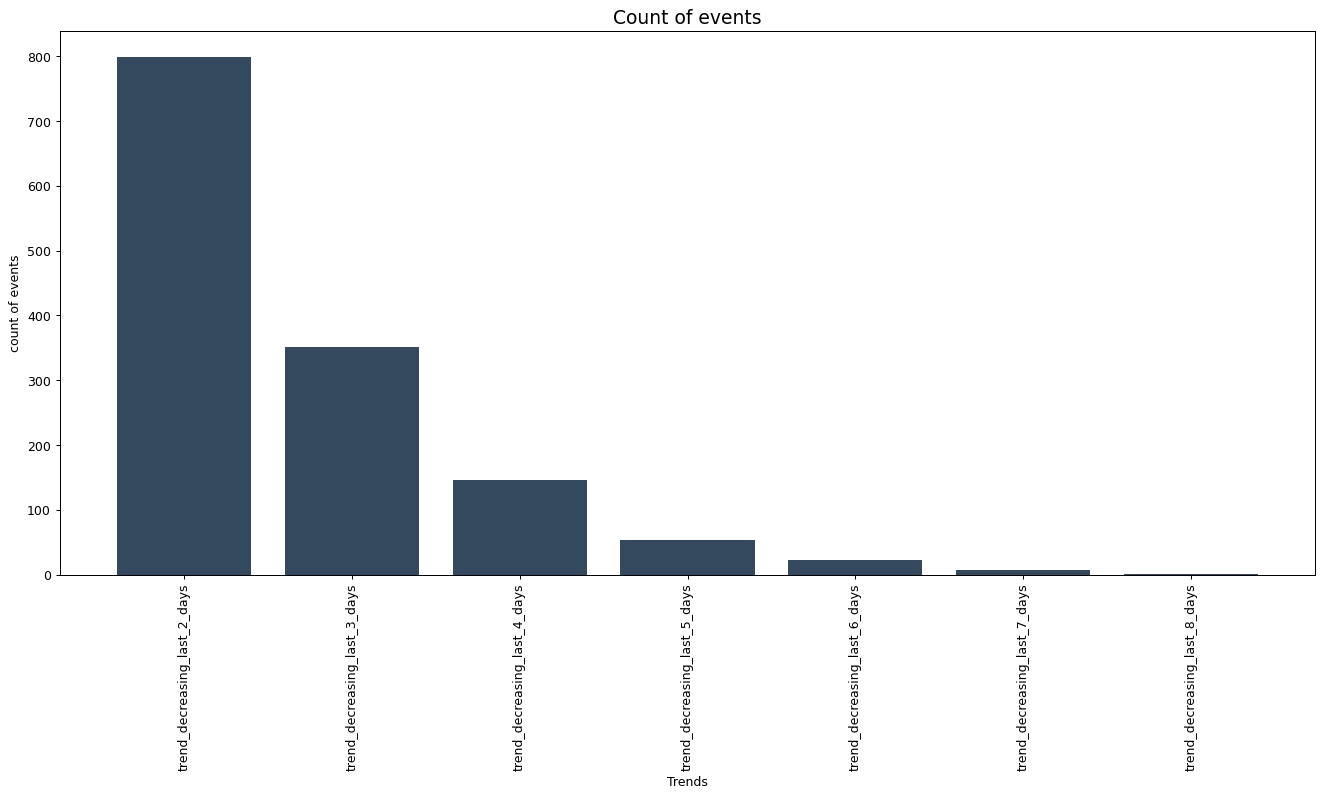

In [252]:


fig,ax = plt.subplots(nrows=1)


# x = np.array(x)
# y = np.array(y)

x_lab =  tmp['name'].values
y_price = tmp['true'].values
ax.bar(x_lab,y_price,color='#34495e')
ax.set_ylabel('count of events')
ax.set_xlabel('Trends')
# ax.plot(x_lab, y_price, "x",color='red',)
ax.grid(False)
plt.xticks(rotation=90)
plt.title('Count of events')
plt.savefig('plots/decreasing_events.png')
plt.savefig('../../fouyapen/assets/plots/ripple/decreasing_events.png')
plt.show()

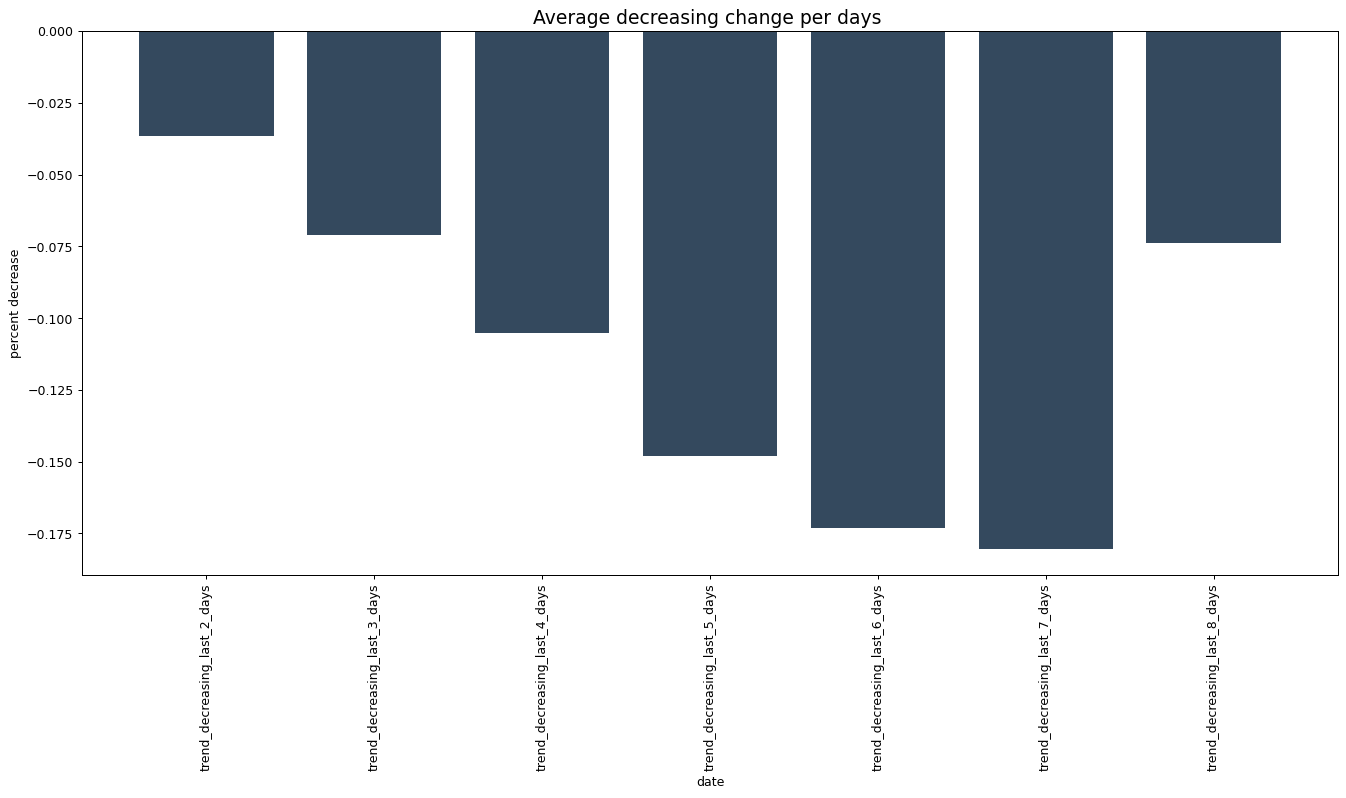

In [253]:
tmp = pd.DataFrame(result)

fig,ax = plt.subplots(nrows=1)


# x = np.array(x)
# y = np.array(y)

x_lab =  tmp['name'].values
y_price = tmp['trend_decreasing_perc'].values



ax.bar(x_lab,y_price,color='#34495e')
ax.set_ylabel('percent decrease')
ax.set_xlabel('date')
# ax.plot(x_lab, y_price, "x",color='red',)
ax.grid(False)
plt.xticks(rotation=90)
plt.title('Average decreasing change per days ')
plt.savefig('plots/decreasing_trend.png')
plt.savefig('../../fouyapen/assets/plots/ripple/decreasing_trend.png')
plt.show()

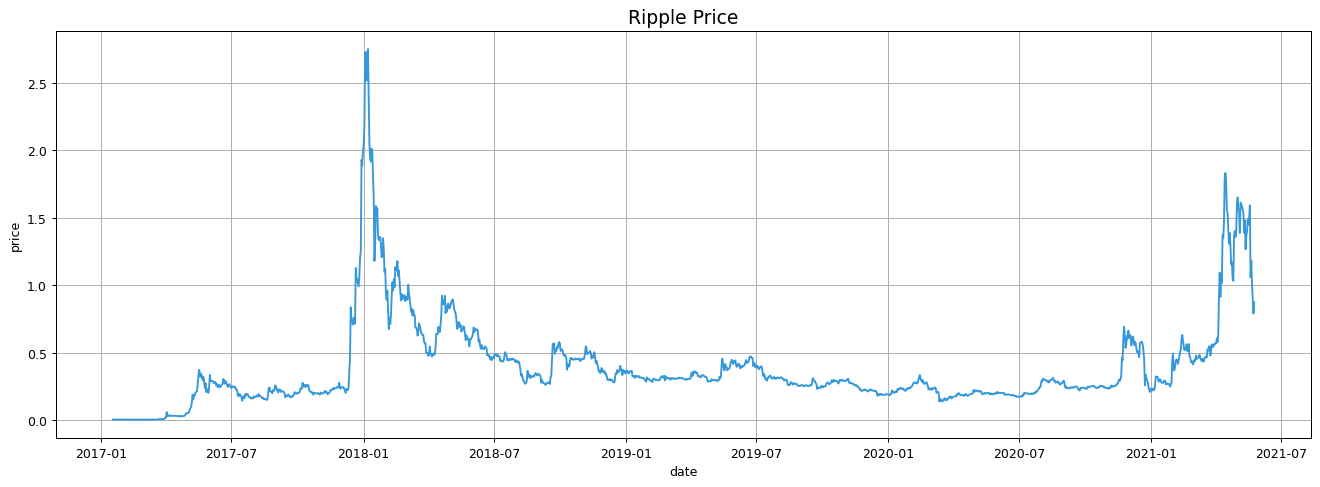

In [254]:
fig,ax = plt.subplots(nrows=1,figsize=(18,6))


# x = np.array(x)
# y = np.array(y)

x_lab =  data['date'].values
y_price = data['close'].values
ax.plot(x_lab,y_price,color='#3498db')
ax.set_ylabel('price')
ax.set_xlabel('date')
# ax.plot(x_lab, y_price, "x",color='red',)
ax.grid(True)
plt.title('Ripple Price')
plt.savefig('plots/ripple_price.png')
plt.savefig('../../fouyapen/assets/plots/ripple/ripple_price.png')
plt.show()

In [280]:
# df_settings[df_settings['name'] == 'test']['start_period'][0]
df_settings[df_settings['name'] == 'test']['end_period'][0]

'2020-06-24'

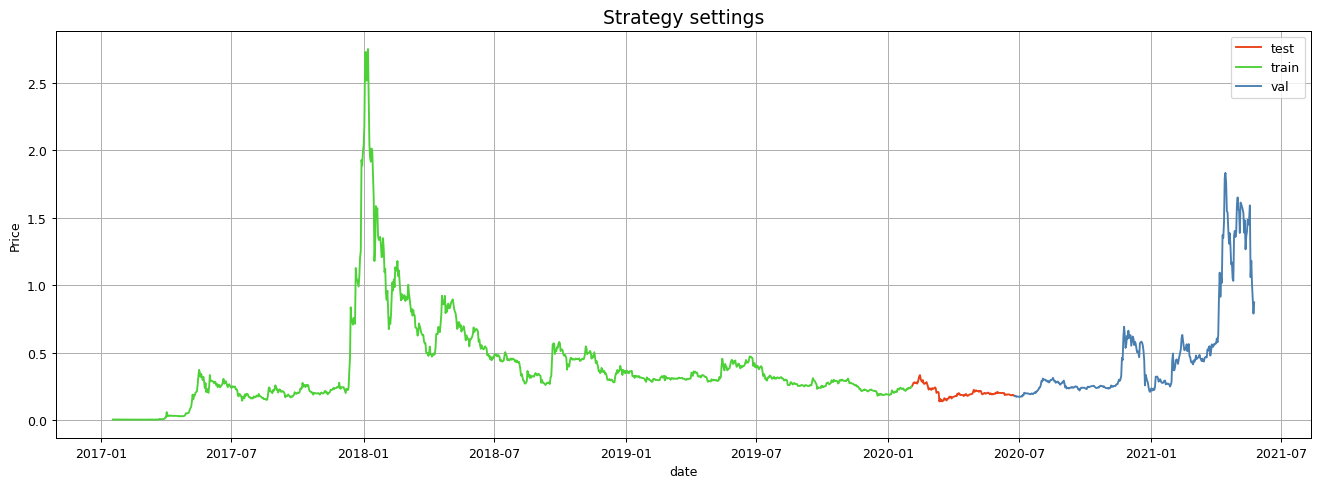

In [300]:
data = pd.read_csv("data/XRP_price_20210524.csv")
data['date'] = data['time'].apply(to_date)
data = data.set_index("date")[['close','high','low']]




df_settings = pd.read_csv("data/settings.csv")
df_settings

fig,ax = plt.subplots(nrows=1,figsize=(18,6))


for (k,c) in zip(['test','train','val'],['#e84118','#4cd137','#487eb0']):
    end = df_settings[df_settings['name'] == k]['end_period'].values[0]
    start =  df_settings[df_settings['name'] == k]['start_period'].values[0]

    tmp = data.loc[pd.Timestamp(start):pd.Timestamp(end)]
    x_lab =  tmp.index
    y_price = tmp['close'].values
    ax.plot(x_lab,y_price,color=c,label=k,lw=1.5)
    ax.grid(True)

plt.xlabel('date')
plt.ylabel('Price')
plt.title("Strategy settings")
plt.legend()
plt.show()
plt.savefig('../../fouyapen/assets/plots/ripple/ripple_opt_settings.png')
plt.close()

In [268]:
data = data.set_index("date")[['close','high','low']]

KeyError: "None of ['date'] are in the columns"

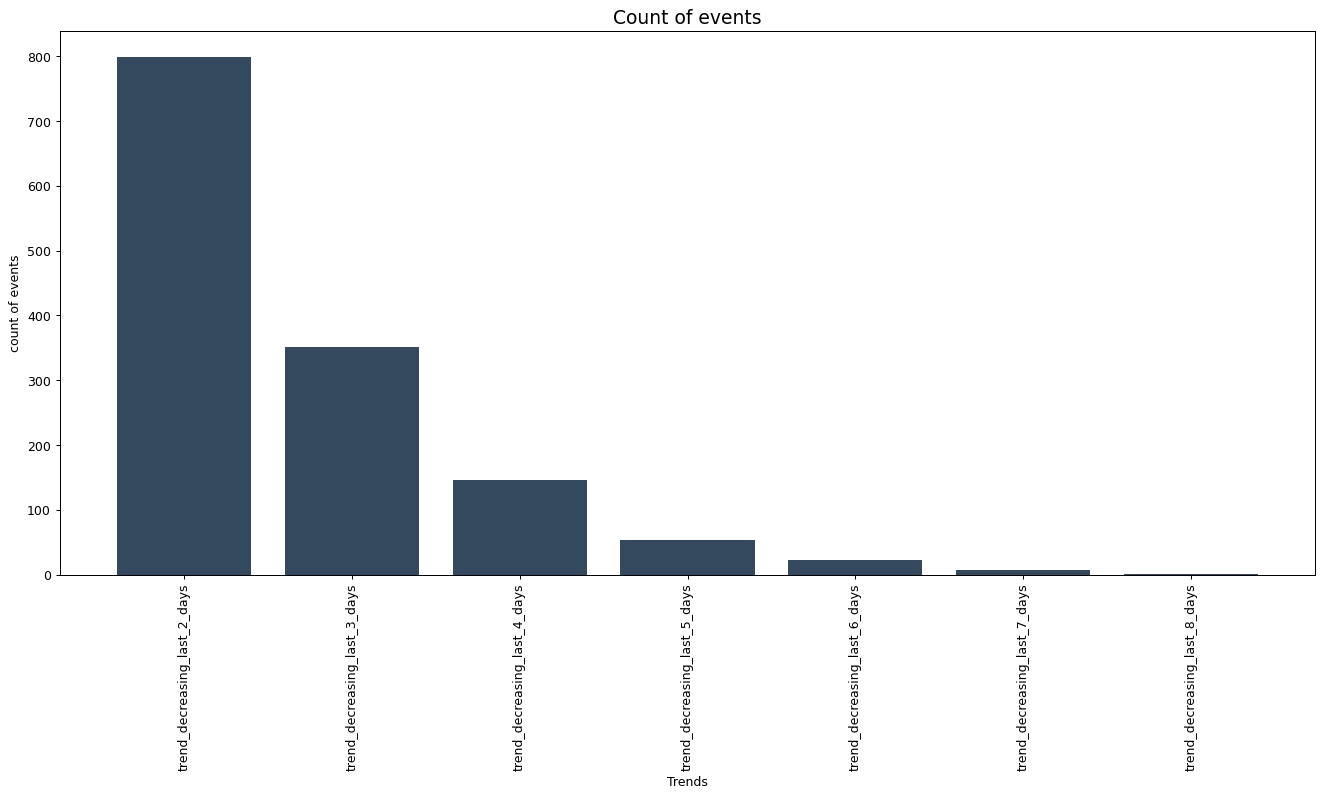

In [305]:
df_down = pd.read_csv('data/down_analysis.csv')
tmp = df_down



fig,ax = plt.subplots(nrows=1)

x_lab =  tmp['name'].values
y_price = tmp['true'].values
ax.bar(x_lab,y_price,color='#34495e')
ax.set_ylabel('count of events')
ax.set_xlabel('Trends')
# ax.plot(x_lab, y_price, "x",color='red',)
ax.grid(False)
plt.xticks(rotation=90)
plt.title('Count of events')
# plt.savefig('plots/decreasing_events.png')
# plt.savefig('../../fouyapen/assets/plots/ripple/decreasing_events.png')
plt.show()

In [308]:
df_up

,name,true,false
0,trend_increasing_last_2_days,777,811
1,trend_increasing_last_3_days,334,1254
2,trend_increasing_last_4_days,147,1441
3,trend_increasing_last_5_days,74,1514
4,trend_increasing_last_6_days,40,1548
5,trend_increasing_last_7_days,22,1566
6,trend_increasing_last_8_days,8,1580
7,trend_increasing_last_9_days,4,1584


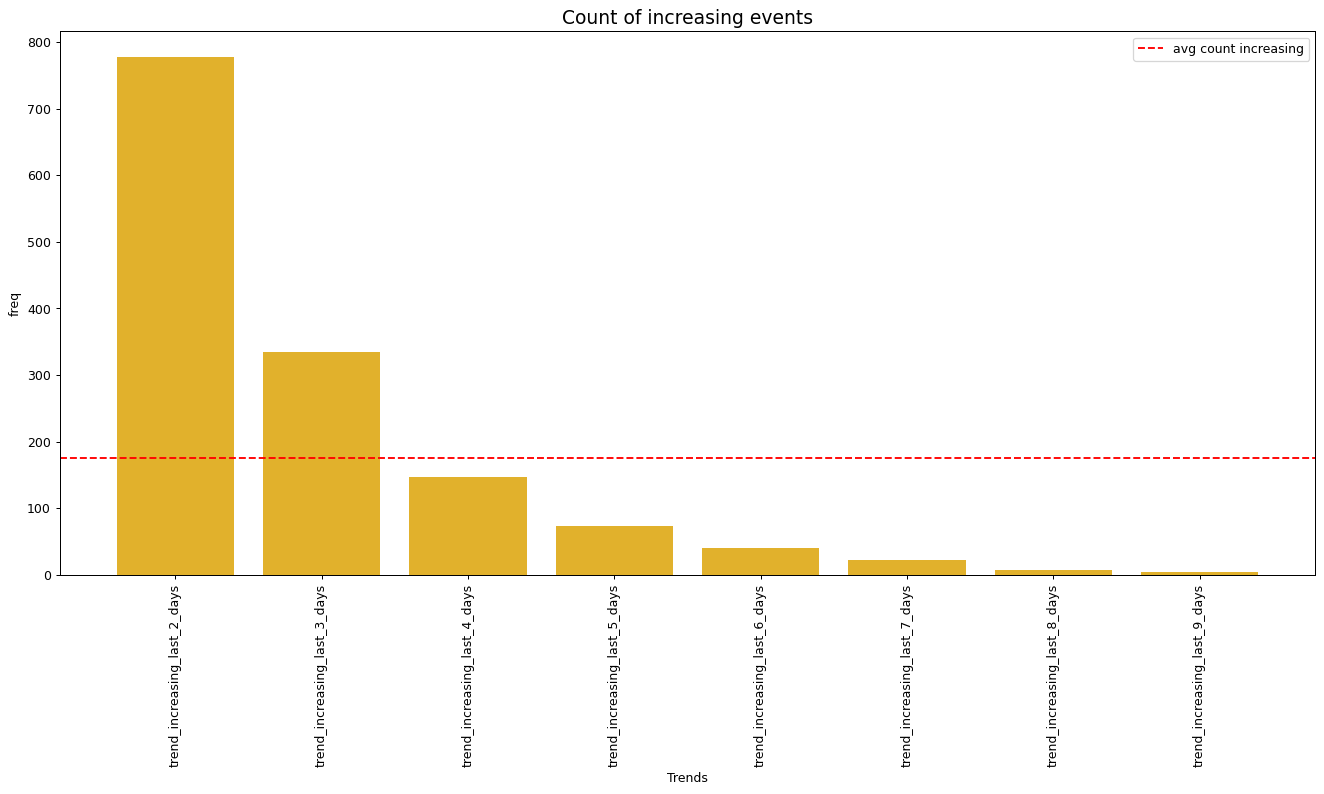

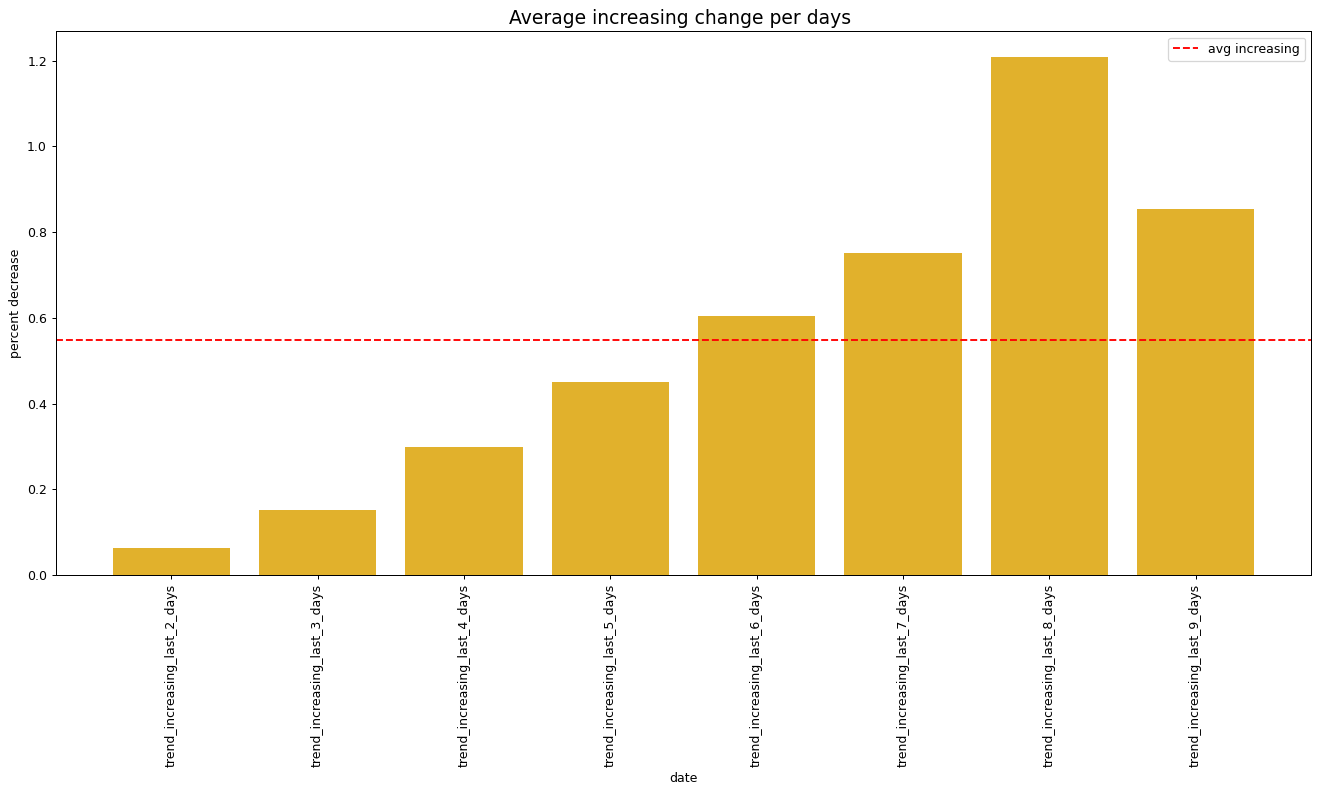

In [333]:
df_up = pd.read_csv('data/up_analysis.csv')
tmp = df_up

trend = 'increasing'
fig,ax = plt.subplots(nrows=1)


c ='#e1b12c'

x_lab =  tmp['name'].values
y_price = tmp['true'].values
ax.bar(x_lab,y_price,color=c)
ax.axhline(np.mean(y_price),lw=1.5,color='red',ls='--',label=f'avg count {trend}') 
ax.set_ylabel('freq')
ax.set_xlabel('Trends')
plt.legend()
# ax.plot(x_lab, y_price, "x",color='red',)
ax.grid(False)
plt.xticks(rotation=90)
plt.title('Count of increasing events')
plt.savefig('plots/increasing_events.png')
plt.savefig('../../fouyapen/assets/plots/ripple/increasing_event.png')
plt.show()






fig,ax = plt.subplots(nrows=1)


x_lab =  tmp['name'].values
y_price = tmp['trend_increasing_perc'].values



ax.bar(x_lab,y_price,color=c)
ax.set_ylabel('percent decrease')
ax.set_xlabel('date')
ax.grid(False)
ax.axhline(np.mean(y_price),lw=1.5,color='red',ls='--',label=f'avg {trend}') 
plt.xticks(rotation=90)
plt.legend()
plt.title('Average increasing change per days ')
plt.savefig('plots/increasing_trend.png')
plt.savefig('../../fouyapen/assets/plots/ripple/increasing_trend.png')
plt.show()



In [318]:
tmp

,name,trend_increasing_perc,true,false
0,trend_increasing_last_2_days,0.063335,777,811
1,trend_increasing_last_3_days,0.151681,334,1254
2,trend_increasing_last_4_days,0.298572,147,1441
3,trend_increasing_last_5_days,0.450977,74,1514
4,trend_increasing_last_6_days,0.603150,40,1548
5,trend_increasing_last_7_days,0.750885,22,1566
6,trend_increasing_last_8_days,1.207895,8,1580
7,trend_increasing_last_9_days,0.853223,4,1584
